#  Analyzing & visualizing several features in the Medical Dataset.

**The features to analyze:** 
- VitD_levels
- Doc_visits
- TotalCharge

# For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
2. Add a line for the mean (red)
3. Add a line for the median (green)
4. Add a line for for +1 std from the mean (black)
5. Add a line for the - 1 std from the mean (black)
6. Highlight the range between +1 and =1 std (yellow)

# Load Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', None)

# Read in the Data

In [6]:
med_df = pd.read_csv("Data\medical data dist.csv")
med_df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [7]:
med_df.info() # this line of code gives a look at the data properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

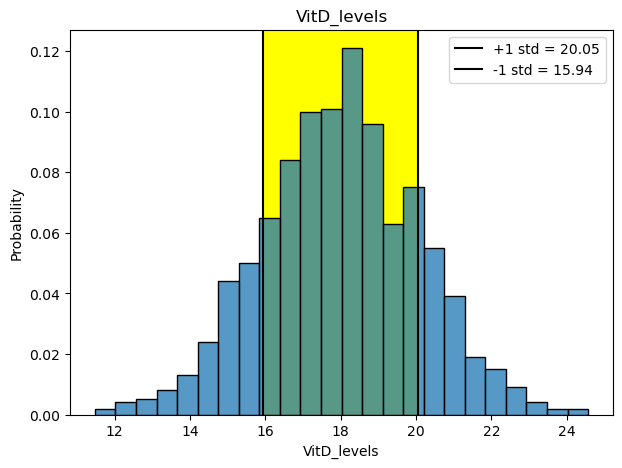

In [10]:
feature = med_df["VitD_levels"]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(feature, ax=ax, stat="probability")
ax.axvline(plus_one_std, color="black", label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color="black", label=f"-1 std = {minus_one_std:,.2f}")
ax.axvspan(plus_one_std, minus_one_std, color="yellow", zorder=0)
ax.set_title("VitD_levels")
ax.legend()

plt.show()

In [11]:
kurt = stats.kurtosis(med_df['VitD_levels'], fisher = False)
kurt

3.013147515833447

**This value is clustered is mesokurtic, with a continuous distribution with no skew.**

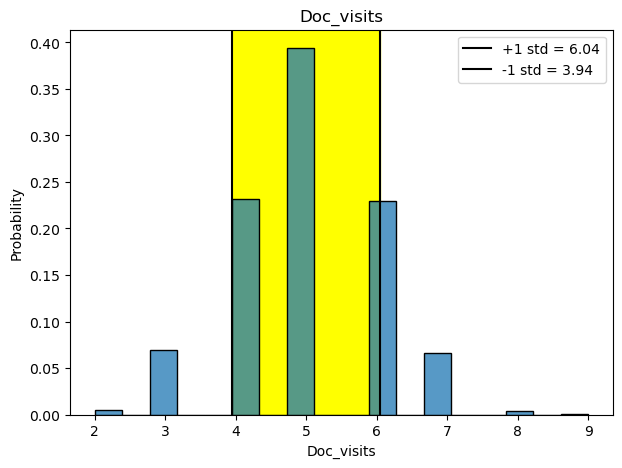

In [12]:
feature = med_df["Doc_visits"]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(feature, ax=ax, stat="probability")
ax.axvline(plus_one_std, color="black", label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color="black", label=f"-1 std = {minus_one_std:,.2f}")
ax.axvspan(plus_one_std, minus_one_std, color="yellow", zorder=0)
ax.set_title("Doc_visits")
ax.legend()

plt.show()

In [13]:
kurt1 = stats.kurtosis(med_df["Doc_visits"], fisher = False)
kurt1

2.9919958083381206

**This is a discrete distribution with a mesokurtic range and no skew.**

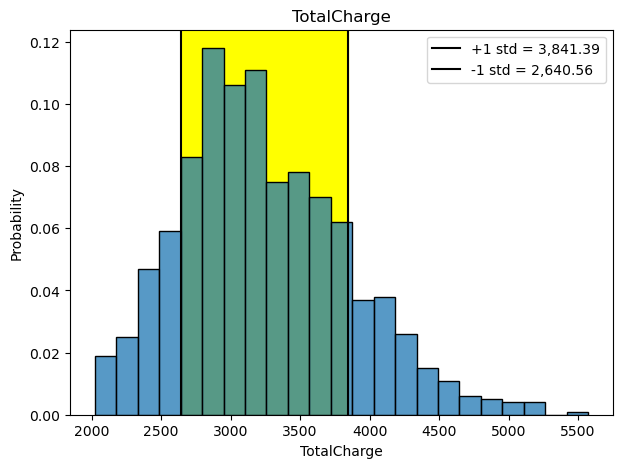

In [14]:
feature = med_df["TotalCharge"]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(feature, ax=ax, stat="probability")
ax.axvline(plus_one_std, color="black", label=f"+1 std = {plus_one_std:,.2f}")
ax.axvline(minus_one_std, color="black", label=f"-1 std = {minus_one_std:,.2f}")
ax.axvspan(plus_one_std, minus_one_std, color="yellow", zorder=0)
ax.set_title("TotalCharge")
ax.legend()

plt.show()

In [15]:
kurt2 = stats.kurtosis(med_df["TotalCharge"], fisher = False)
kurt2

3.2650077463439384

**This is a continuous distribution with a mesokurtic shape and a slightly negative skew.**